## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

In [2]:
# your answer here
alpha = 0.05
P = 2.435
n = 448
timeinproblem = 1
numberofsucceses = 3

In [3]:
from scipy import stats
from scipy.stats import poisson
import numpy as np
from scipy.stats import chi, chi2
import scipy
import matplotlib.pyplot as plt

In [4]:
lambda_possoin = P * timeinproblem
poisson = stats.poisson(lambda_possoin)
# Draw random samples
print('The probability that there are 6 scores within a game is:', round(poisson.pmf(numberofsucceses), 6))

The probability that there are 6 scores within a game is: 0.210784


In [5]:
scores = [0,1,2,3,4,5,6,7]

In [6]:
observed = [35,99,104,110,62,25,10,3]

In [7]:
n = np.sum(observed)
expected = []
for i in scores:
    a = poisson.pmf(i)*n
    print(a)
    expected.append(a)
diff = np.subtract(observed, expected)
chi_squared = np.sum(np.divide(np.square(diff),expected))

print("here we have the CHI: ", chi_squared)

df = len(observed) - 1 - 1 #we want to estimate 1 parameter and we have 1 to reduce as baseline. 
dist = chi2(df)
criticalvalue = dist.ppf(1-alpha)

print ("Critical value is this one here: ", criticalvalue)
print("")

if chi_squared> criticalvalue:
    print("YES, we can reject the null hypothesis")
else: 
    print(":( we don't really know. We can't reject null hypothesis")

39.243790677529816
95.55863029978511
116.34263238998835
94.4314366232072
57.48513704437739
27.995261740611806
11.361410389731613
3.952147756999499
here we have the CHI:  5.526588649191276
Critical value is this one here:  12.591587243743977

:( we don't really know. We can't reject null hypothesis


Text(0, 0.5, 'Probability')

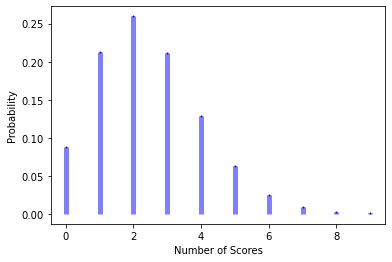

In [8]:
x = np.arange(0,10)
fig, ax = plt.subplots(1, 1)
ax.plot(x, poisson.pmf(x,), 'bo', ms=1, label='poisson pmf')
#Plot axis vertical lines
ax.vlines(x, 0, poisson.pmf(x), colors='b', lw=5, alpha=0.5)
plt.xlabel('Number of Scores')
plt.ylabel('Probability')

## BONUS/OPTIONAL - Question 2
Let's analyze a discrete distribution. To analyze the number of defective items in a factory in the city of Medellín, we took a random sample of n = 60 articles and observed the number of defectives in the following table:

![](table2.png)

A poissón distribution was proposed since it is defined for x = 0,1,2,3, .... using the following model:

![](image1.png)

For some extra insights check the following link: https://online.stat.psu.edu/stat504/node/63/ 

Does the distribution of defective items follow this distribution?

In [9]:
defects = [0,1,3,4]

In [10]:
observed = [32,15,9,4]

In [11]:
P = 3.92 

In [12]:
# your code here
timeinproblem = 1

lambda_possoin = P * timeinproblem
poisson = stats.poisson(lambda_possoin)
poisson

In [13]:
n = np.sum(observed)
expected = []
for i in defects:
    a = poisson.pmf(i)*n
    print(a)
    expected.append(a)
diff = np.subtract(observed, expected)
chi_squared = np.sum(np.divide(np.square(diff),expected))

print("here we have the CHI: ", chi_squared)

df = len(observed) - 1 - 1 #we want to estimate 1 parameter and we have 1 to reduce as baseline. 
dist = chi2(df)
criticalvalue = dist.ppf(1-alpha)

print ("Critical value is this one here: ", criticalvalue)
print("")

if chi_squared> criticalvalue:
    print("YES, we can reject the null hypothesis")
else: 
    print(":( we don't really know. We can't reject null hypothesis")

1.1904656846622172
4.666625483875892
11.951538972571743
11.712508193120309
here we have the CHI:  826.0468712197
Critical value is this one here:  5.991464547107979

YES, we can reject the null hypothesis


## Question 3
A quality control engineer takes a sample of 10 tires that come out of an assembly line, and would like to verify on the basis of the data that follows, if the number of tires with defects observed over 200 days, if it is true that 5% of all tires have defects (that is, if the sample comes from a binomial population with n = 10 and p = 0.05). 

![](table3.png)


In [14]:
from scipy.stats import binom
from scipy.stats import binom_test

In [15]:
# your answer here
p=0.05
x = 53 + 9

In [16]:
binom_test(x, n=200, p=0.05, alternative='less')


0.9999999999999999

## Question 4
A researcher gathers information about the patterns of Physical Activity of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (Low, Medium, High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (Yes = consumed, No = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table4.png)

In [17]:
#your answer here: I am not really sure how to conclude here, it seems prety spurious and not enough data, I would rather look for another model not categorical (average min per week of activity) and run ANOVA on top of it. 

#According to below it seems sugar is influencing some how towards low activity.

# Low Activity Sugar comsuption:

p=0.05
x = 32
binom_test(x, n=44, p=0.05, alternative='less')


0.9999999999999999

In [18]:
# Medium Activity Sugar comsuption
p=0.05
x = 14
binom_test(x, n=36, p=0.05, alternative='less')

0.9999999999378727

In [19]:
# High Activity Sugar comsuption
p=0.05
x = 6
binom_test(x, n=15, p=0.05, alternative='less')

0.9999964818001033

In [20]:
# Total Activity Sugar comsuption
p=0.05
x = 52
binom_test(x, n=95, p=0.05, alternative='less')

0.9999999999999999